# What are the most important internal and external features in predicting rental prices? 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from statsmodels.formula.api import ols, glm, wls
from statsmodels.api import families
from numpy import log


df = pd.read_csv('../data/curated/engineered-data.csv')


In [100]:
selected_property_types = ['Townhouse', 'House', 'Apartment', 'Unit']
df.loc[:, 'propertyType'] = df['propertyType'].apply(lambda t: t if t in selected_property_types else 'Other')

len(df)

10422

In [101]:
df = df[df['propertyType'] != 'Other']
len(df)

10152

In [102]:
df

,suburb,postcode,price,propertyType,bedrooms,bathrooms,parkingSpaces,studies,furnished,closest_primary_distance,...,closest_bus_distance,closest_park_distance,min_pri_icsea,min_sec_icsea,park_walkability,is_primary_school_walkable,is_secondary_school_walkable,is_tram_stop_walkable,is_train_station_walkable,city
0,Melbourne,3000,560,Apartment,2,1,0,0,N,821.8,...,136.5,1410.7,1140.0,1127.0,$<$1.5 km,Yes,No,$<$1.5 km,$<$1.5 km,True
1,Melbourne,3000,580,Apartment,2,1,0,0,Y,1690.6,...,522.3,2518.5,1114.0,1138.0,1.5-5km,No,No,$<$1.5 km,$<$1.5 km,True
2,Melbourne,3000,450,Apartment,1,1,0,0,N,786.9,...,237.6,1417.0,1140.0,1127.0,$<$1.5 km,Yes,No,$<$1.5 km,$<$1.5 km,True
3,Melbourne,3000,550,Apartment,2,2,1,0,N,2026.9,...,625.0,2203.4,1114.0,1138.0,1.5-5km,No,No,$<$1.5 km,1.5-5km,True
4,Melbourne,3000,600,Apartment,2,1,0,0,Y,1690.6,...,522.3,2518.5,1114.0,1138.0,1.5-5km,No,No,$<$1.5 km,$<$1.5 km,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,Mount Dandenong,3767,750,House,3,2,6,0,N,2244.4,...,8.8,1524.7,1105.0,NaN,1.5-5km,No,No,$>$5 km,$>$5 km,False
10418,Cockatoo,3781,300,House,1,1,1,0,N,1761.4,...,1023.2,4077.9,1007.0,1016.0,1.5-5km,No,No,$>$5 km,$>$5 km,False
10419,Emerald,3782,680,House,3,2,2,1,N,3251.3,...,1149.6,2423.3,1020.0,1016.0,1.5-5km,No,No,$>$5 km,$>$5 km,False
10420,Emerald,3782,490,House,3,1,1,0,N,2350.8,...,1531.3,1771.8,1054.0,1016.0,1.5-5km,No,No,$>$5 km,$>$5 km,False


In [103]:
df.head(20)

,suburb,postcode,price,propertyType,bedrooms,bathrooms,parkingSpaces,studies,furnished,closest_primary_distance,...,closest_bus_distance,closest_park_distance,min_pri_icsea,min_sec_icsea,park_walkability,is_primary_school_walkable,is_secondary_school_walkable,is_tram_stop_walkable,is_train_station_walkable,city
0,Melbourne,3000,560,Apartment,2,1,0,0,N,821.8,...,136.5,1410.7,1140.0,1127.0,$<$1.5 km,Yes,No,$<$1.5 km,$<$1.5 km,True
1,Melbourne,3000,580,Apartment,2,1,0,0,Y,1690.6,...,522.3,2518.5,1114.0,1138.0,1.5-5km,No,No,$<$1.5 km,$<$1.5 km,True
2,Melbourne,3000,450,Apartment,1,1,0,0,N,786.9,...,237.6,1417.0,1140.0,1127.0,$<$1.5 km,Yes,No,$<$1.5 km,$<$1.5 km,True
3,Melbourne,3000,550,Apartment,2,2,1,0,N,2026.9,...,625.0,2203.4,1114.0,1138.0,1.5-5km,No,No,$<$1.5 km,1.5-5km,True
4,Melbourne,3000,600,Apartment,2,1,0,0,Y,1690.6,...,522.3,2518.5,1114.0,1138.0,1.5-5km,No,No,$<$1.5 km,$<$1.5 km,True
5,Melbourne,3000,650,Apartment,2,2,1,0,N,1778.6,...,610.3,2606.5,1114.0,1138.0,1.5-5km,No,No,$<$1.5 km,$<$1.5 km,True
6,Melbourne,3000,465,Apartment,1,1,0,0,Y,1846.4,...,592.7,2151.5,1108.0,1138.0,1.5-5km,No,No,$<$1.5 km,1.5-5km,True
7,Melbourne,3000,500,Apartment,1,1,0,0,N,1430.8,...,839.4,1157.9,1140.0,1138.0,$<$1.5 km,Yes,No,$<$1.5 km,$<$1.5 km,True
8,Melbourne,3000,590,Apartment,2,1,0,0,Y,1729.2,...,175.9,2425.5,1114.0,1127.0,1.5-5km,No,No,$<$1.5 km,$<$1.5 km,True
9,Melbourne,3000,360,Apartment,2,1,0,0,Y,2144.8,...,41.0,1992.5,1140.0,1138.0,1.5-5km,No,No,$<$1.5 km,$<$1.5 km,True


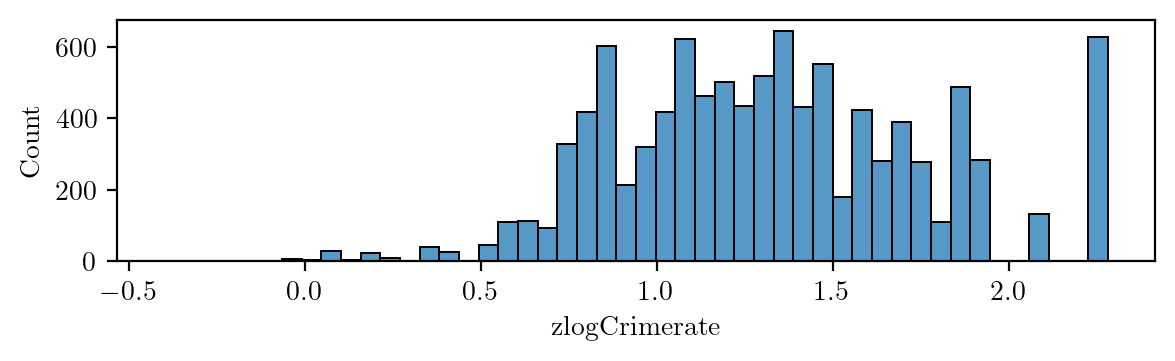

In [104]:
sns.histplot(data=df, x='zlogCrimerate', log_scale=False)
plt.savefig('../plots/crime-rate.png')

In [105]:
df.corr()

,postcode,price,bedrooms,bathrooms,parkingSpaces,studies,closest_primary_distance,closest_secondary_distance,closest_train_distance,closest_tram_distance,cbd_distance,cbd_duration,zlogCrimerate,closest_bus_distance,closest_park_distance,min_pri_icsea,min_sec_icsea,city
postcode,1.000000,0.048912,0.086964,0.054426,0.116144,-0.004808,-0.005819,0.012847,0.040008,0.066453,0.315729,0.374703,-0.291288,0.012971,0.024574,0.001497,-0.041196,-0.333001
price,0.048912,1.000000,0.396122,0.475336,0.189835,0.135578,-0.033379,-0.058053,-0.098455,-0.204047,-0.200640,-0.188508,-0.107511,0.011407,-0.186792,0.281952,0.275099,0.103781
bedrooms,0.086964,0.396122,1.000000,0.558092,0.537654,0.068557,0.082534,0.180212,0.378611,0.394458,0.442521,0.462544,-0.108185,0.076465,0.232314,-0.232143,-0.251811,-0.270967
bathrooms,0.054426,0.475336,0.558092,1.000000,0.332526,0.125307,0.106111,0.110120,0.252287,0.215702,0.218333,0.223653,-0.052354,0.079672,0.079849,-0.032537,-0.024566,-0.085931
parkingSpaces,0.116144,0.189835,0.537654,0.332526,1.000000,0.071861,0.039185,0.128576,0.276824,0.317264,0.402379,0.441489,-0.164975,0.028553,0.216875,-0.219970,-0.279125,-0.346011
studies,-0.004808,0.135578,0.068557,0.125307,0.071861,1.000000,0.022089,0.008511,0.036697,0.006882,-0.006816,-0.003189,-0.010894,0.010938,0.000671,0.020484,0.037732,0.029105
closest_primary_distance,-0.005819,-0.033379,0.082534,0.106111,0.039185,0.022089,1.000000,0.384040,0.396787,0.222667,0.156973,0.119755,0.093882,0.328857,0.084142,-0.048046,0.027783,0.053635
closest_secondary_distance,0.012847,-0.058053,0.180212,0.110120,0.128576,0.008511,0.384040,1.000000,0.495921,0.307703,0.280394,0.269717,-0.040262,0.249920,0.127832,-0.105164,-0.121399,-0.040863
closest_train_distance,0.040008,-0.098455,0.378611,0.252287,0.276824,0.036697,0.396787,0.495921,1.000000,0.547517,0.499329,0.461796,-0.025011,0.326012,0.220420,-0.289218,-0.239876,-0.186793
closest_tram_distance,0.066453,-0.204047,0.394458,0.215702,0.317264,0.006882,0.222667,0.307703,0.547517,1.000000,0.866840,0.785644,0.163874,0.158470,0.257924,-0.559682,-0.530237,-0.230182


<AxesSubplot:xlabel='closest_primary_distance', ylabel='Count'>

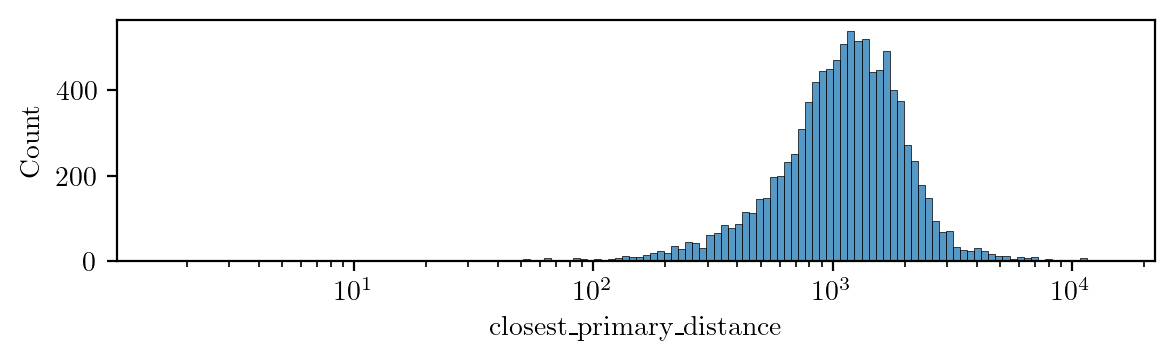

In [106]:
sns.histplot(df, x='closest_primary_distance', log_scale=True)

<AxesSubplot:xlabel='closest_park_distance', ylabel='Count'>

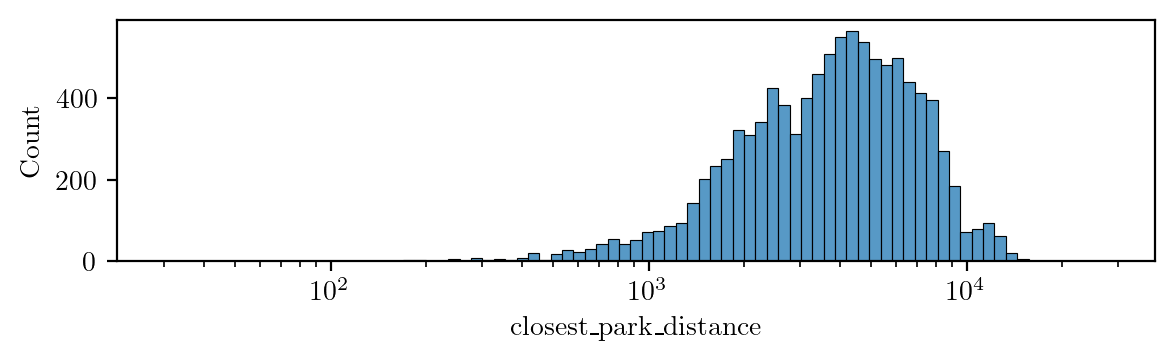

In [107]:
sns.histplot(df, x='closest_park_distance', log_scale=True)

<AxesSubplot:xlabel='closest_secondary_distance', ylabel='Count'>

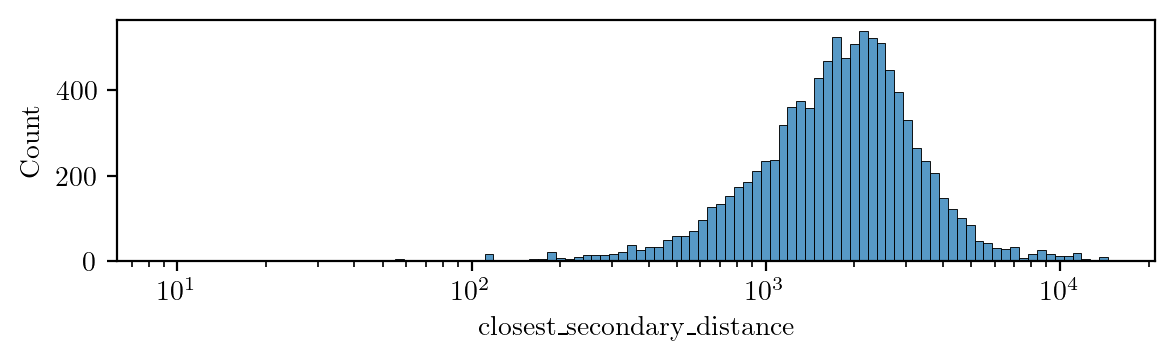

In [108]:
sns.histplot(df, x='closest_secondary_distance', log_scale=True)

<AxesSubplot:xlabel='closest_tram_distance', ylabel='Count'>

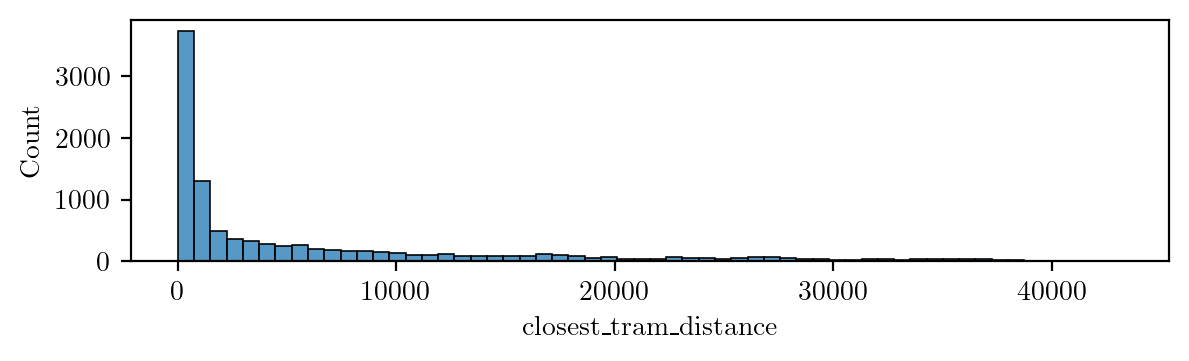

In [109]:
sns.histplot(df, x='closest_tram_distance', log_scale=False)

In [110]:
df.loc[:, 'bedrooms'] = df['bedrooms'].apply(lambda p: 1 if p in {0, 1} else p if p < 4 else '4+')
df.loc[:, 'parkingSpaces'] = df['parkingSpaces'].apply(lambda p: p if p < 3 else '3+')
df.loc[:, 'bathrooms'] = df['bathrooms'].apply(lambda p: p if p < 3 else '3+')


In [111]:
rcParams['figure.dpi'] = 200

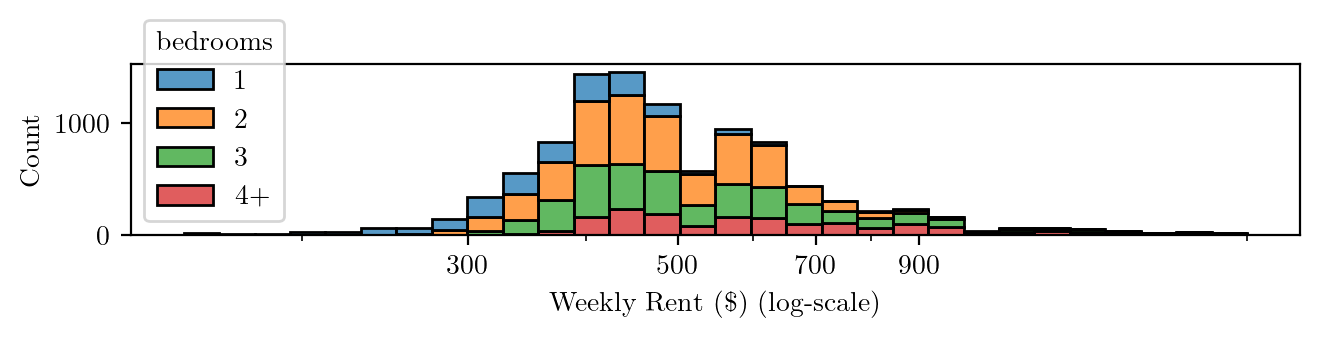

In [112]:
sns.histplot(df, x='price', hue='bedrooms', log_scale=True, multiple='stack', hue_order=[1, 2, 3, '4+'], bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-bedrooms.png')

* More bedrooms -> more rent

Text(0.5, 0, 'Weekly Rent (\\$)')

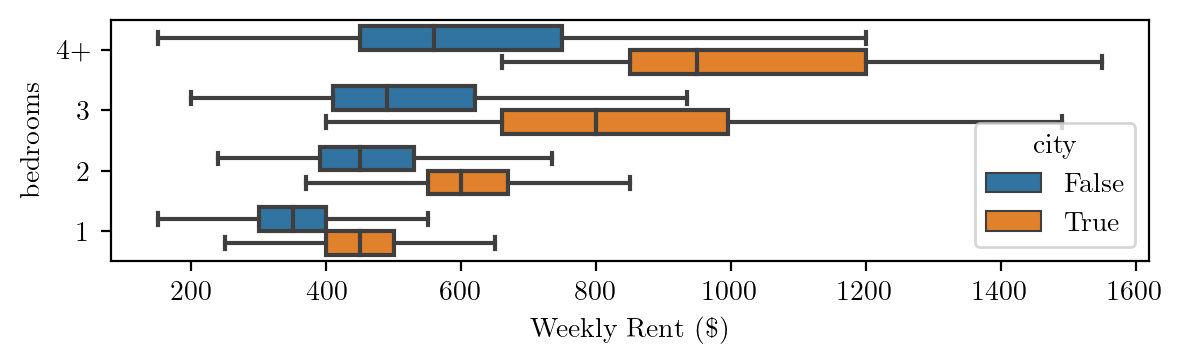

In [113]:
sns.boxplot(data=df, x='price', y='bedrooms', showfliers=False, hue='city', order=[1,2,3,'4+'][::-1])
plt.xlabel(r'Weekly Rent (\$)')

* Being in the city increases the effect of having more bedrooms on property rents

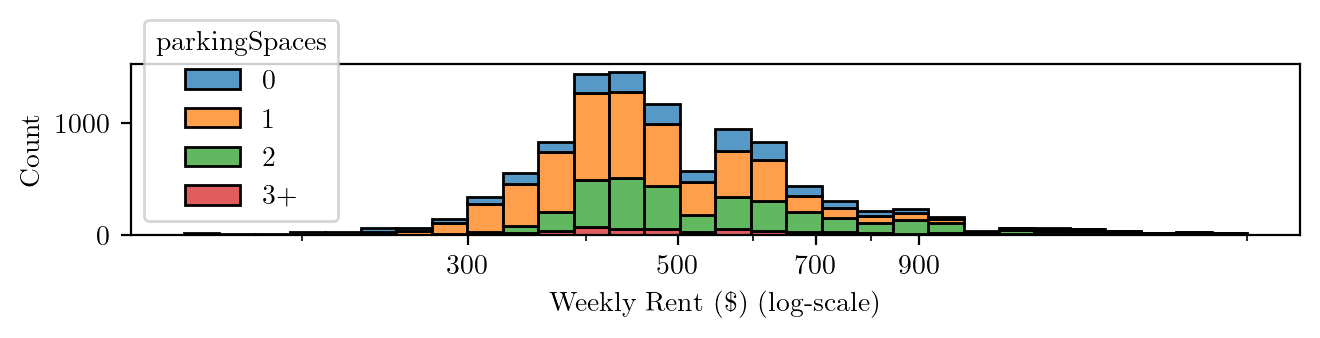

In [114]:
sns.histplot(df, x='price', hue='parkingSpaces', log_scale=True, multiple='stack', bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-parking.png')

* Properties less than $300 almost never have more than 1 parking space
* It is rare for a property to have more than 2 parking spaces, when it does, it doesn't seem to impact the rent

Text(0.5, 0, 'Weekly Rent (\\$)')

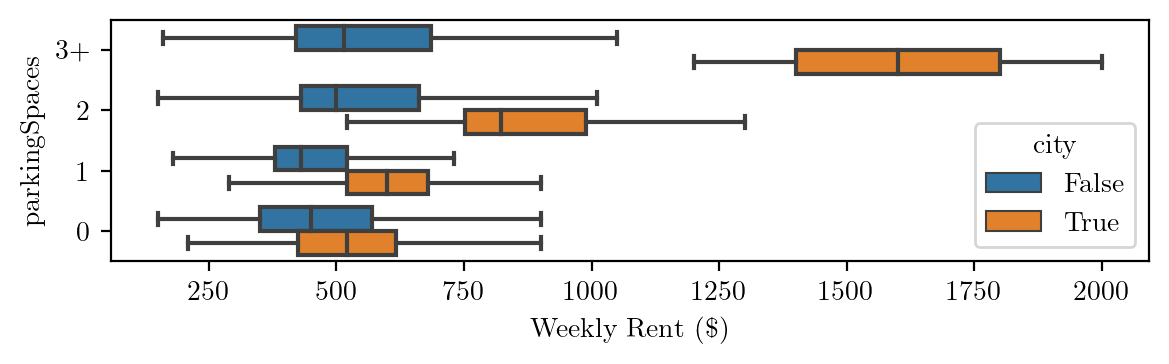

In [115]:
sns.boxplot(data=df, x='price', y='parkingSpaces', showfliers=False, hue='city', order=[0,1,2,'3+'][::-1])
plt.xlabel(r'Weekly Rent (\$)')

* City parking spaces are worth more than subruban ones

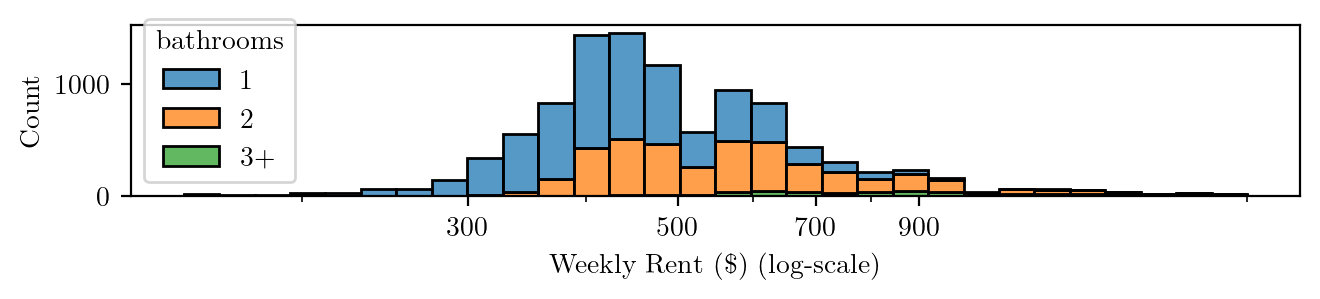

In [116]:
sns.histplot(df, x='price', hue='bathrooms', log_scale=True, multiple='stack', bins=30)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-bathrooms.png')

* Affordable properties almost never have more than 1 bathroom.
* Few properties have more than 2 bathrooms, those which do attract a premium.

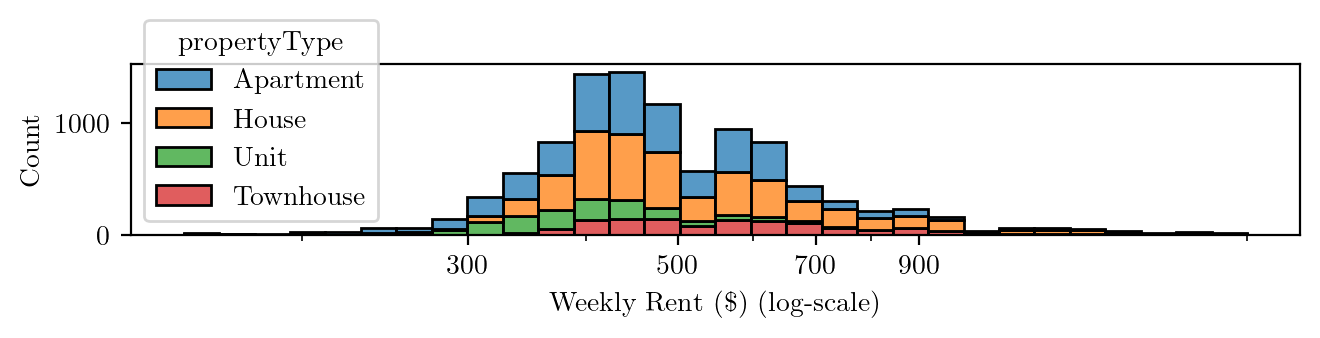

In [117]:
sns.histplot(data=df, x='price', hue='propertyType', multiple='stack',
             bins=30, log_scale=True)
plt.xlabel(r'Weekly Rent (\$) (log-scale)')
plt.xticks([300, 500, 700, 900], labels=['300', '500', '700', '900'])
plt.tight_layout()
plt.savefig('../plots/rent-distn-by-type.png')


* Townhouses attract a premium
* Units are more affordable

<AxesSubplot:xlabel='price', ylabel='Count'>

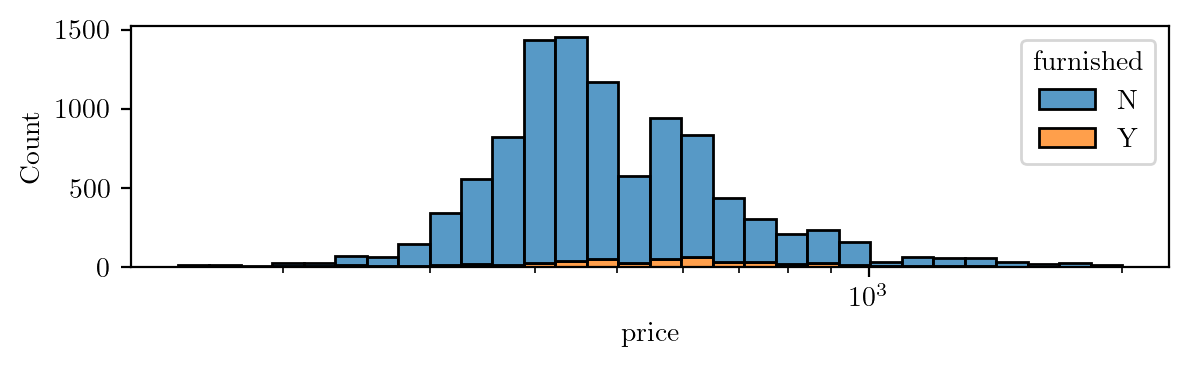

In [118]:
sns.histplot(data=df, x='price', hue='furnished', multiple='stack',
             bins=30, log_scale=True)

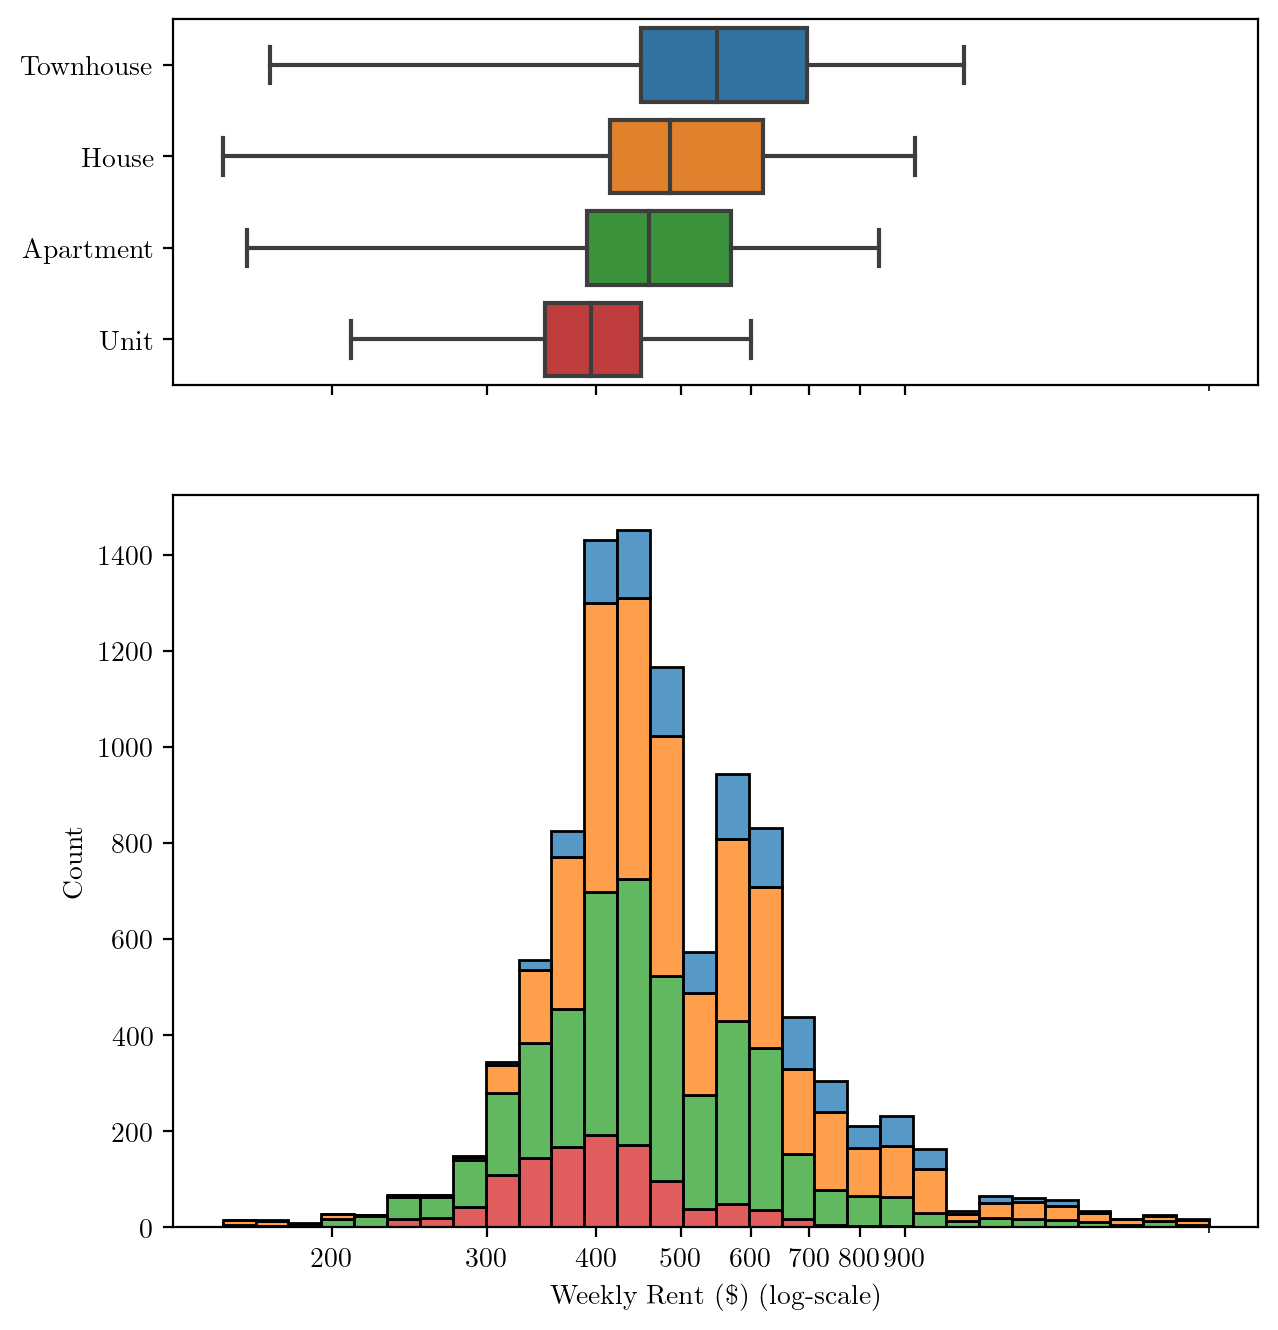

In [119]:
f, ((ax2, ax4)) = plt.subplots(2, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

sns.histplot(data=df, x='price', hue='propertyType', multiple='stack', hue_order=selected_property_types,
             bins=30, log_scale=True, ax=ax4, legend=False)

ax4.set_xlabel(r'Weekly Rent (\$) (log-scale)')
ax4.set_xticks([200, 300, 400, 500, 600, 700, 800, 900], labels=['200', '300', '400', '500', '600','700', '800', '900'])

sns.boxplot(data=df, x='price', y='propertyType', showfliers=False, order=selected_property_types, ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')

f.savefig('../plots/property-type-boxplot-distplot')

In [120]:
f.show()

/tmp/ipykernel_12689/1831071131.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


Text(0.5, 1.0, 'Rents by Property Type')

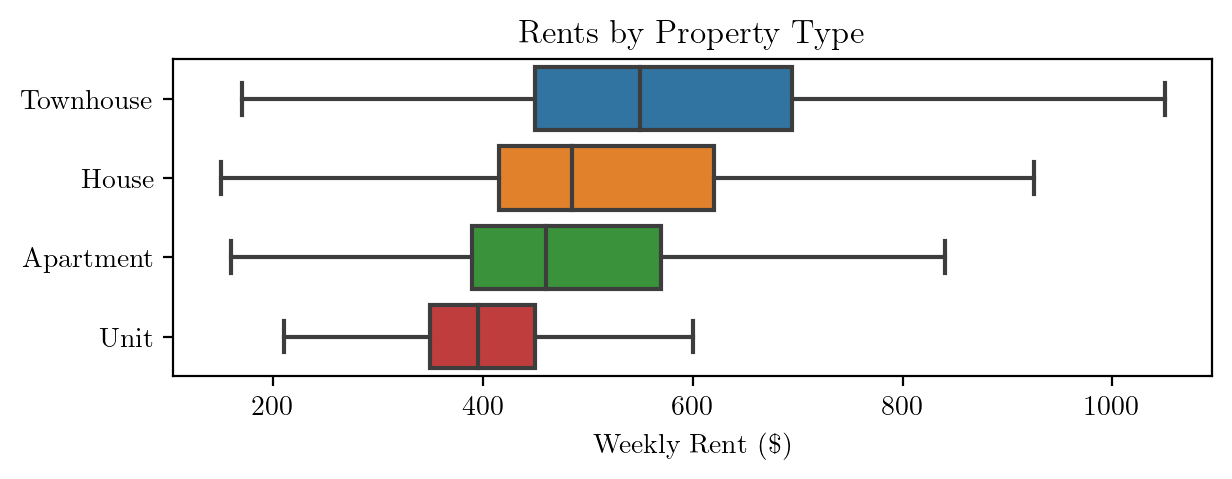

In [121]:
rcParams['figure.figsize'] = 6.70132, 2.1

sns.boxplot(data=df, x='price', y='propertyType', showfliers=False, order=selected_property_types)
plt.xlabel(r'Weekly Rent (\$)')
plt.ylabel('')
plt.title('Rents by Property Type')

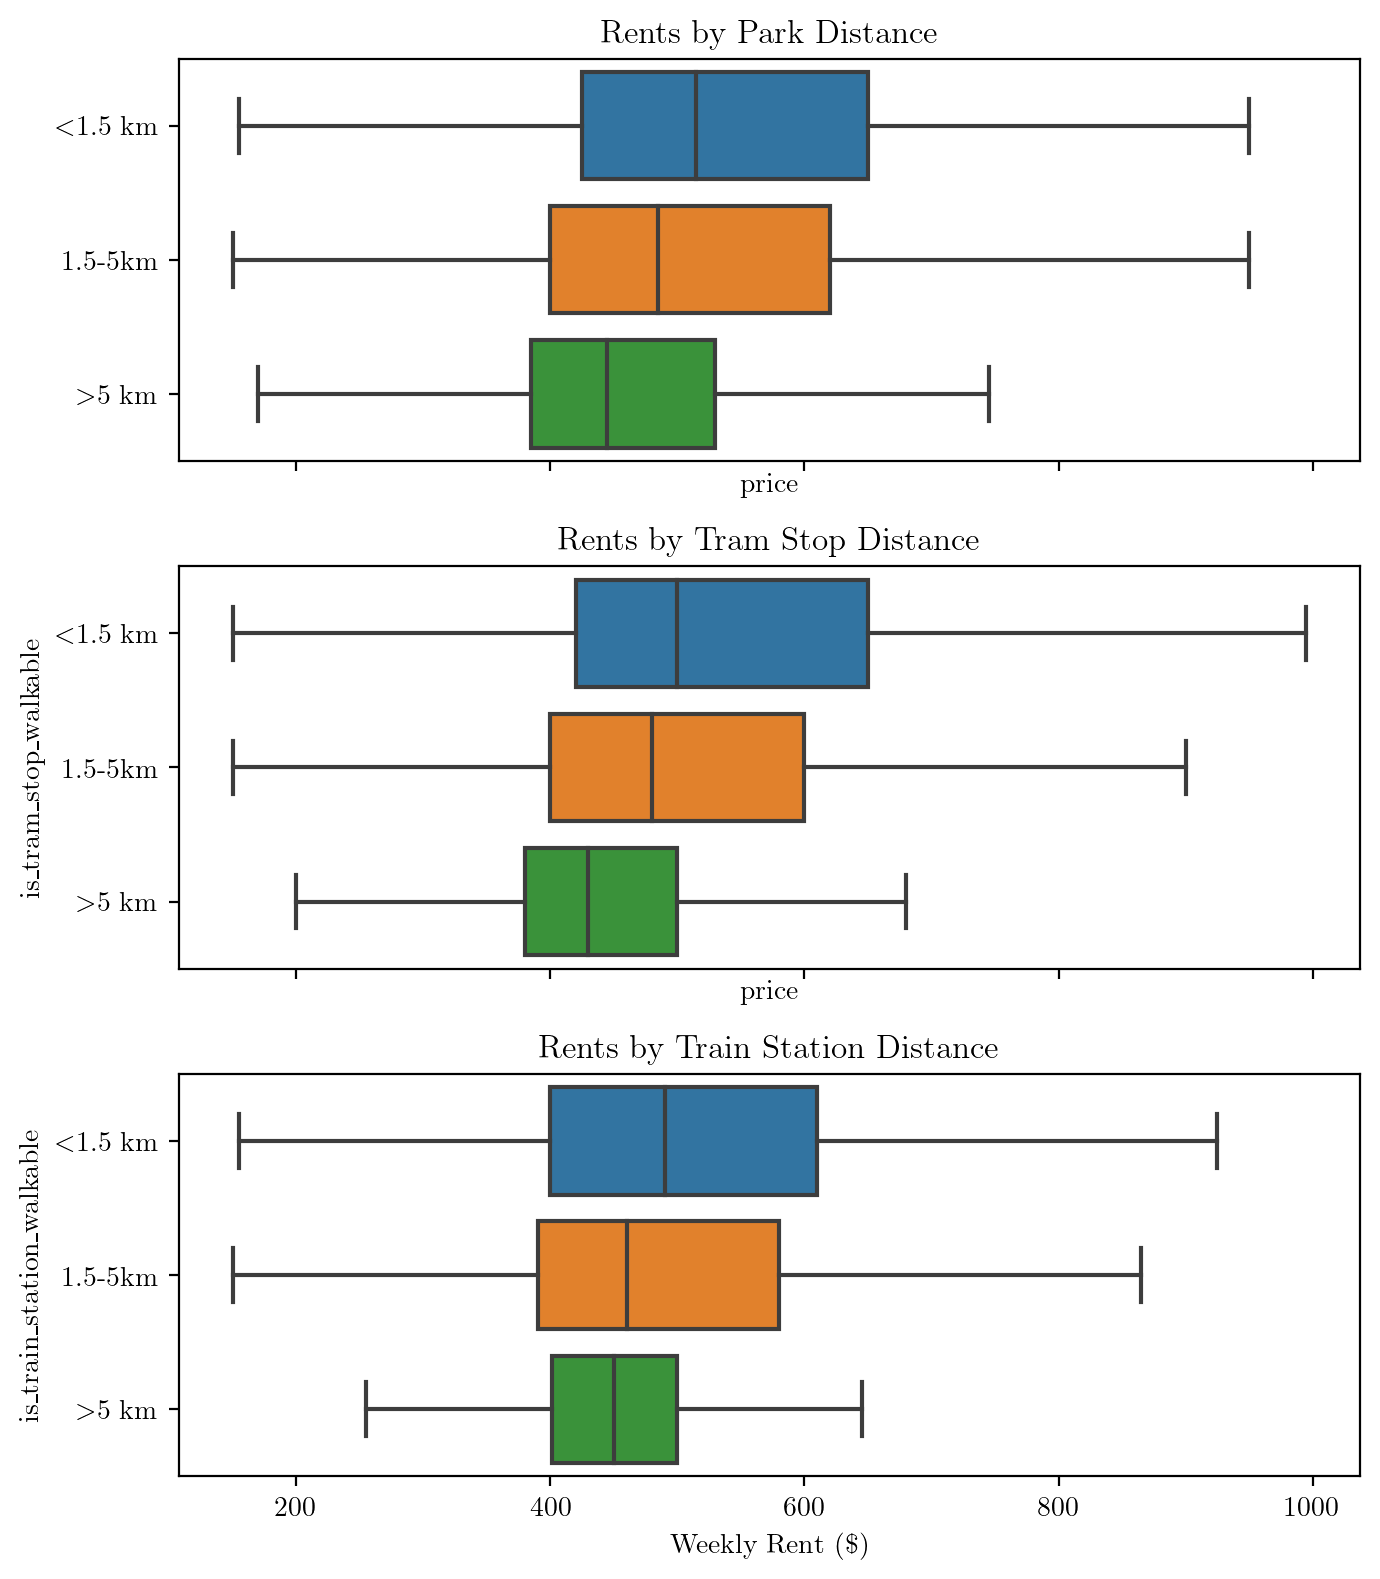

In [134]:
f, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})


sns.boxplot(data=df, x='price', y='park_walkability', showfliers=False, ax=ax1)
ax1.set_title('Rents by Park Distance')

sns.boxplot(data=df, x='price', y='is_tram_stop_walkable', showfliers=False, ax=ax2)
sns.boxplot(data=df, x='price', y='is_train_station_walkable', showfliers=False, ax=ax3)

ax2.set_title('Rents by Tram Stop Distance')
ax3.set_title('Rents by Train Station Distance')

for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('')
    ax.set_ylabel('')


ax3.set_xlabel(r'Weekly Rent (\$)')



plt.tight_layout()
plt.savefig('../plots/rent-by-park-walkability.png')

In [123]:
rcParams['figure.figsize'] = 6.70132, 1.6

plt.tight_layout()
plt.savefig('../plots/rent-by-primary-school-walkability.png')

<Figure size 1340.26x320 with 0 Axes>

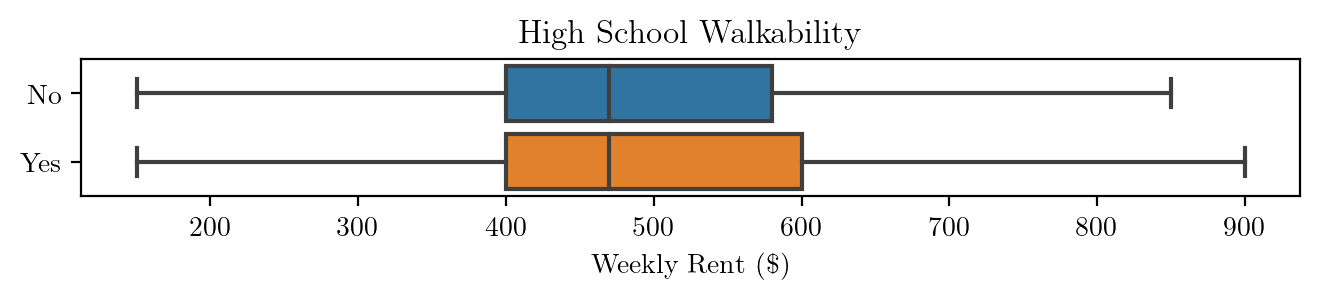

In [124]:

sns.boxplot(data=df, x='price', y='is_secondary_school_walkable',
            showfliers=False)
plt.xlabel(r'Weekly Rent (\$)')
plt.title('High School Walkability')
plt.ylabel('')
plt.tight_layout()
plt.savefig('../plots/rent-by-secondary-school-walkability.png')

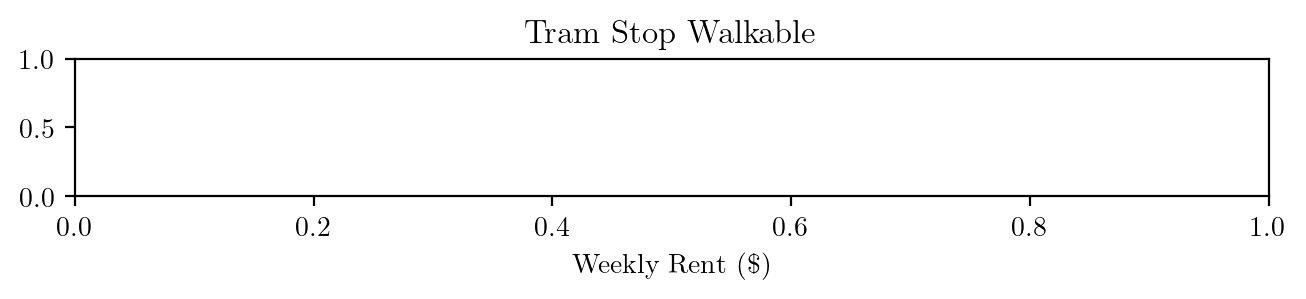

In [125]:
plt.xlabel(r'Weekly Rent (\$)')
plt.ylabel('')
plt.title('Tram Stop Walkable')
plt.tight_layout()
plt.savefig('../plots/rent-by-tram-service.png')

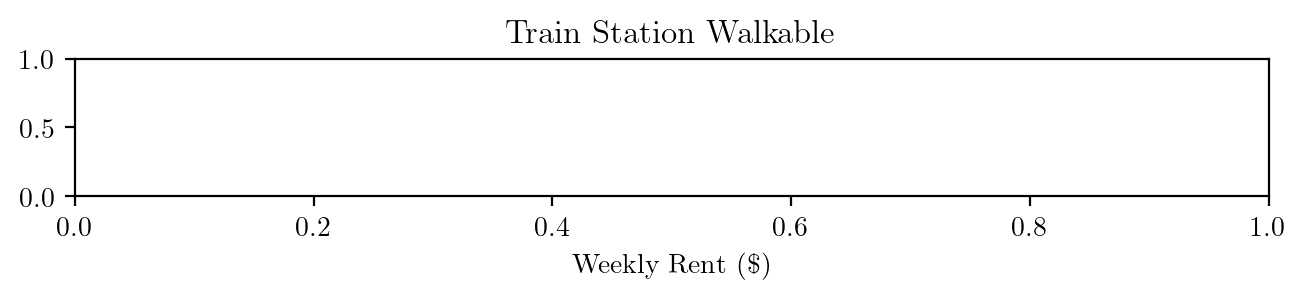

In [126]:
plt.xlabel(r'Weekly Rent (\$)')
plt.ylabel('')
plt.title('Train Station Walkable')
plt.tight_layout()
plt.savefig('../plots/rent-by-train-service.png')

In [127]:
model = glm(formula="""price ~ closest_train_distance + closest_tram_distance
                             + closest_bus_distance + closest_park_distance""",
            families=families.Gaussian(link=families.links.log()),
            data=df)

model.fit().summary()

# Model interpretation:
#
# Effect of suburb properties on rental income
#
# Train station distance has no effect
# Properties close to tram stops are valued more
# Properties further from bus stops are valued more
# Properties close to parks are valued more
# Primary school ICSEA increases value alot

/home/lachstr/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                10152
Model:                            GLM   Df Residuals:                    10147
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          41743.
Method:                          IRLS   Log-Likelihood:                -68408.
Date:                Thu, 06 Oct 2022   Deviance:                   4.2356e+08
Time:                        17:37:31   Pearson chi2:                 4.24e+08
No. Iterations:                     3   Pseudo R-squ. (CS):            0.06548
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                593.2125      4.333    136.891      0.000     584.719     601.706
closest_train_distance     0.0018      0.001      1.724      0.085      -0.000       0.004
closest_tram_distance     -0.0044      0.000    -15.834      0.000      -0.005      -0.004
closest_bus_distance       0.0125      0.003      4.245      0.000       0.007       0.018
closest_park_distance     -0.0123      0.001    -14.665      0.000      -0.014      -0.011
==========================================================================================
"""

In [128]:

model = ols(formula="""price ~ closest_primary_distance + closest_secondary_distance""",
            data=df)

model.fit().summary()

# Model interpretation:
#
# Effect of suburb properties on rental income, a
#
# Primary school distance has no effect
# Properties closer to public secondary schools are valued more

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     17.90
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.74e-08
Time:                        17:37:31   Log-Likelihood:                -68722.
No. Observations:               10152   AIC:                         1.375e+05
Df Residuals:                   10149   BIC:                         1.375e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    543.8449      4.178    130.171      0.000     535.655     552.034
closest_primary_distance      -0.0030      0.002     -1.212      0.226      -0.008       0.002
closest_secondary_distance    -0.0077      0.002     -4.944      0.000      -0.011      -0.005
==============================================================================
Omnibus:                     5448.147   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47234.621
Skew:                           2.450   Prob(JB):                         0.00
Kurtosis:                      12.362   Cond. No.                     5.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='zlogCrimerate', ylabel='logPrice'>

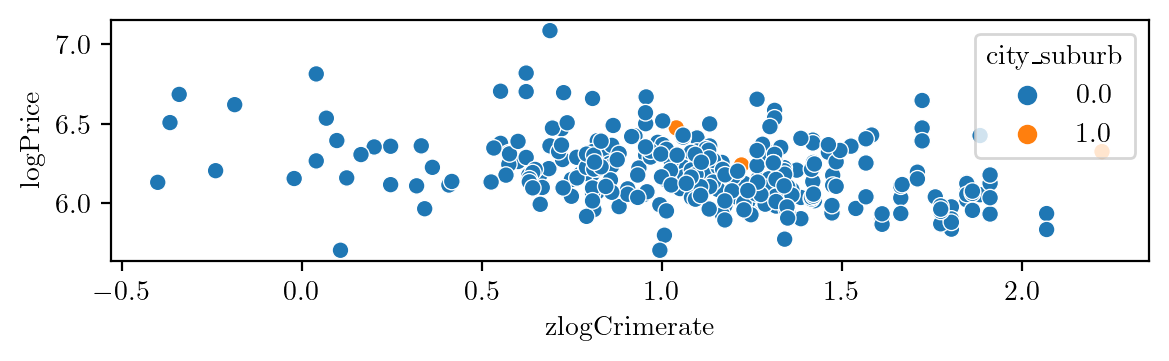

In [129]:

df['city_suburb'] = df['suburb'].apply(lambda s: s in ['Melbourne', 'East Melbourne', 'Carlton'])

df2 = df.dropna(subset='zlogCrimerate')
df2['logPrice'] = log(df2['price'])
df2 = df2.groupby(by=['suburb']).mean()

sns.scatterplot(data=df2, x='zlogCrimerate', y='logPrice', hue='city_suburb')

In [130]:
model = glm(formula="""price ~ zlogCrimerate""",
            families=families.Gaussian(link=families.links.log()),
            data=df)

model.fit().summary()

/home/lachstr/.local/lib/python3.10/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['families']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                10152
Model:                            GLM   Df Residuals:                    10150
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          44043.
Method:                          IRLS   Log-Likelihood:                -68681.
Date:                Thu, 06 Oct 2022   Deviance:                   4.4703e+08
Time:                        17:37:31   Pearson chi2:                 4.47e+08
No. Iterations:                     3   Pseudo R-squ. (CS):            0.01162
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       591.4362      6.559     90.178      0.000     578.582     604.291
zlogCrimerate   -50.9645      4.678    -10.895      0.000     -60.133     -41.796
=================================================================================
"""